<div style="text-align: center;">
  <img src="Images/Placement.png" alt="Placement Illustration" width="600"/>
</div>

## Hello!
This is a project utilizing the **Placement Prediction Dataset** to analyze and predict student placement outcomes. By exploring this dataset, we aim to identify key factors that influence placement success and develop machine learning models for accurate classification of placement status.  

The dataset, available on [Kaggle](https://www.kaggle.com/datasets/ruchikakumbhar/placement-prediction-dataset), contains **10,000 rows** and **12 columns**, providing detailed academic and extracurricular records of students, along with their placement status. It is well-structured with no missing values, making it suitable for analysis and classification tasks. 

#### Dataset Overview
The dataset includes the following features:  

1. **CGPA**: Cumulative Grade Point Average, representing a student’s overall academic performance.  
2. **Internships**: The number of internships completed by a student.  
3. **Projects**: Number of projects undertaken by the student.  
4. **Workshops/Certifications**: Participation in workshops and online courses for skill enhancement.  
5. **Aptitude Test Score**: Measures a student’s quantitative and logical reasoning skills, often used in recruitment.  
6. **Soft Skills Rating**: Assesses communication and interpersonal skills.  
7. **Extracurricular Activities**: Indicates student involvement in non-academic activities.  
8. **Placement Training**: Training programs provided by colleges to help students prepare for placement.  
9. **SSC & HSC Marks**: Academic performance in Senior Secondary (SSC) and Higher Secondary (HSC) levels.  
10. **Placement Status**: The target variable, indicating whether a student was **Placed** or **Not Placed**.  

#### Project Inspiration  
This project is inspired by the need to analyze key factors affecting student placements and build predictive models to assist career guidance efforts. Understanding the most influential attributes can help students and institutions improve placement strategies.  

#### Goals of the Project  
1. **Data Analysis**: Explore the dataset to identify trends and correlations among academic, training, and extracurricular features.  
2. **Classification Models**: Develop and evaluate machine learning models to predict placement status based on the provided features.  

> ⚠️ *Disclaimer*: The goal is to build predictive tools and derive insights—not to stereotype or oversimplify student capabilities. Ethical analysis and transparency are essential.

# **Step 2: Exploratory Data Analysis (EDA) – Data Visualization**

This notebook focuses on the **visual exploration and analysis** of the Placement dataset. The goal is to understand data distributions, relationships, and patterns using various graphical techniques to inform further analysis and modeling.

---

### Objectives of This Notebook

1. [Univariate Analysis: Distribution of Single Variables](#univariate-analysis)  
2. [Bivariate Analysis: Exploring Relationships Between Two Variables](#bivariate-analysis)  
3. [Data Encoding: Converting Categorical Variables](#data-encoding)  
4. [Multivariate Analysis: Examining Interactions Among Multiple Variables](#multivariate-analysis)  
5. [Summary and Key Insights](#summary)

---

### Next Steps

- Step 3: [EDA – SQL Queries](./03_eda_sql_queries.ipynb)   
- Step 5: [Modeling & Prediction](./04_modeling_prediction.ipynb)

## **2.1 Import Libraries and Load the Dataset**

We start by importing the necessary Python libraries and loading the dataset into a DataFrame.

In [34]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a Python library that supports fast operations on large, multi-dimensional arrays and provides a wide range of mathematical functions.
import numpy as np

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt

# Seaborn is a Python visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# Import display function to render DataFrames or outputs neatly in the notebook
from IPython.display import display

In [35]:
# Load the dataset
print("Previewing the raw dataset:")
df = pd.read_csv('placement_cleaned.csv')
display(df.head())

Previewing the raw dataset:


,cgpa,internships,projects,trainings,aptitudetestscore,softskillsrating,ecas,placementtraining,ssc_marks,hsc_marks,placementstatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


---

<a id="inspection"></a>

## **2.2 Initial Inspection**

We inspect the structure, data types, and basic info of the dataset.

In [36]:
# Display basic structure of the dataset
print("Dataset Info:")
display(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cgpa               9928 non-null   float64
 1   internships        9928 non-null   int64  
 2   projects           9928 non-null   int64  
 3   trainings          9928 non-null   int64  
 4   aptitudetestscore  9928 non-null   int64  
 5   softskillsrating   9928 non-null   float64
 6   ecas               9928 non-null   object 
 7   placementtraining  9928 non-null   object 
 8   ssc_marks          9928 non-null   int64  
 9   hsc_marks          9928 non-null   int64  
 10  placementstatus    9928 non-null   object 
dtypes: float64(2), int64(6), object(3)
memory usage: 853.3+ KB


None

In [37]:
# Summary statistics for numerical columns
print("Numerical Summary:")
display(df.describe().T)

Numerical Summary:


,count,mean,std,min,25%,50%,75%,max
cgpa,9928.0,7.693946,0.639961,6.5,7.4,7.7,8.2,9.1
internships,9928.0,1.042808,0.663699,0.0,1.0,1.0,1.0,2.0
projects,9928.0,2.019944,0.867118,0.0,1.0,2.0,3.0,3.0
trainings,9928.0,1.006849,0.903612,0.0,0.0,1.0,2.0,3.0
aptitudetestscore,9928.0,79.376209,8.140884,60.0,73.0,80.0,87.0,90.0
softskillsrating,9928.0,4.320679,0.411211,3.0,4.0,4.4,4.7,4.8
ssc_marks,9928.0,69.093372,10.428709,55.0,59.0,70.0,78.0,90.0
hsc_marks,9928.0,74.425766,8.901786,57.0,67.0,73.0,83.0,88.0


In [38]:
# Summary statistics for categorical columns
print("Categorical Summary:")
display(df.describe(include=[object]).T)

Categorical Summary:


,count,unique,top,freq
ecas,9928,2,Yes,5784
placementtraining,9928,2,Yes,7246
placementstatus,9928,2,NotPlaced,5801


In [39]:
# Checking the shape of the dataset (rows, columns)
print(f"The dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns.")

The dataset contains 9,928 rows and 11 columns.


In [40]:
# Getting the column for the dataframe
print(f"The dataset columns include:")
display(df.columns)

The dataset columns include:


Index(['cgpa', 'internships', 'projects', 'trainings', 'aptitudetestscore',
       'softskillsrating', 'ecas', 'placementtraining', 'ssc_marks',
       'hsc_marks', 'placementstatus'],
      dtype='object')

---

<a id="univariate-analysis"></a>

## **2.3 Univariate Analysis: Distribution of Single Variables**

We explore the distribution and frequency of individual variables to understand their characteristics and spot potential data quality issues.

In [41]:
# Grouping the Columns
columns_1 = ['internships', 'projects', 'trainings']
columns_2 = ['ecas', 'placementtraining', 'placementstatus']

In [42]:
# Creating Countplots for Each of the variables
def plot_categorical_counts(columns):
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if i < len(axes):
            sns.countplot(x=column, data=df, ax=axes[i])
            axes[i].set_title(f'Count Plot of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

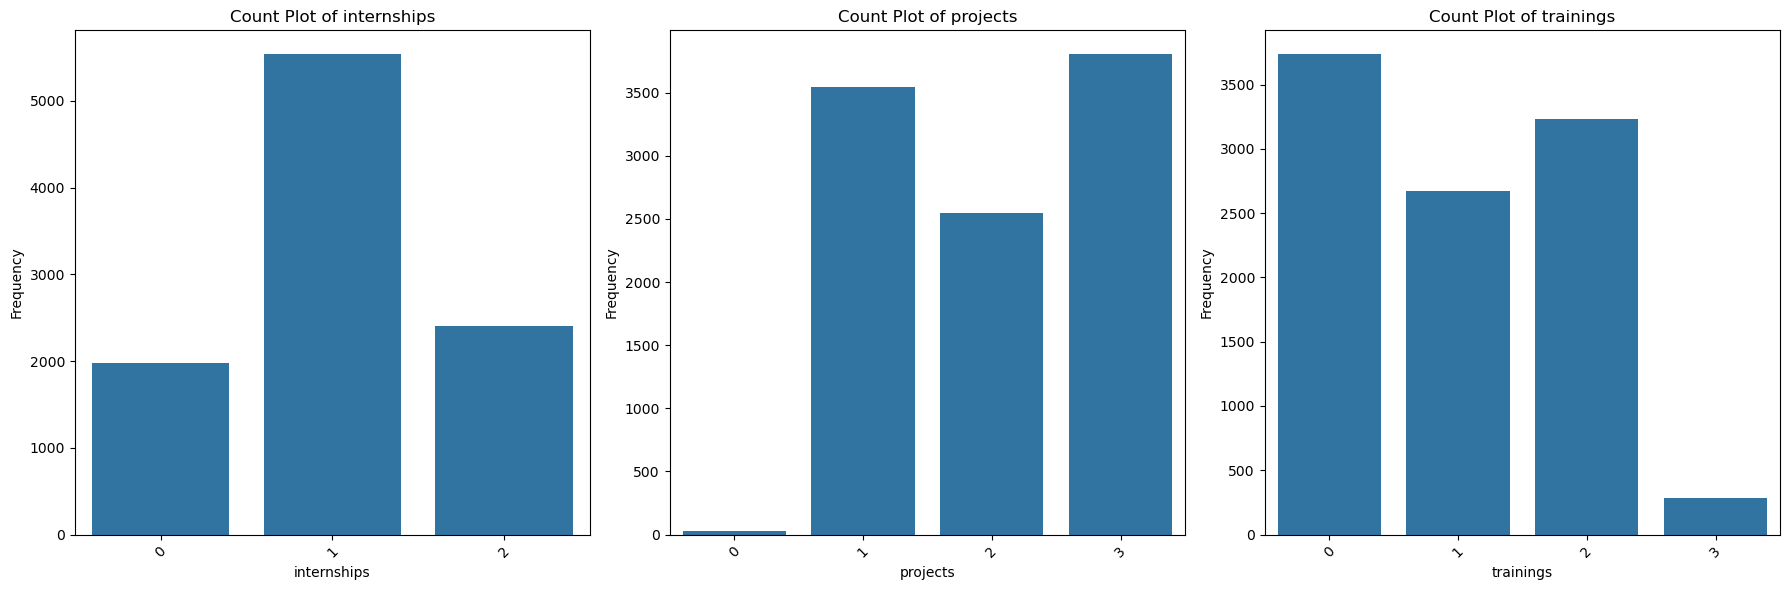

In [43]:
plot_categorical_counts(columns_1)

#### Summary of the Plots for the Categorical Variables

1. **Internships**:  
   The majority of individuals have completed **one internship**, followed by those with **two internships**. A smaller group has completed **zero internships**.

2. **Projects**:  
   The most common number of projects completed by individuals is **three**, followed closely by **one project**. **Two projects** are less frequent, while having **zero projects** is quite rare.

3. **Workshops/Certifications**:  
   Most individuals have attended **one workshop/certification**, with **two workshops** being the next most frequent. A significant portion has attended **zero workshops**, while **three workshops** are the least common.

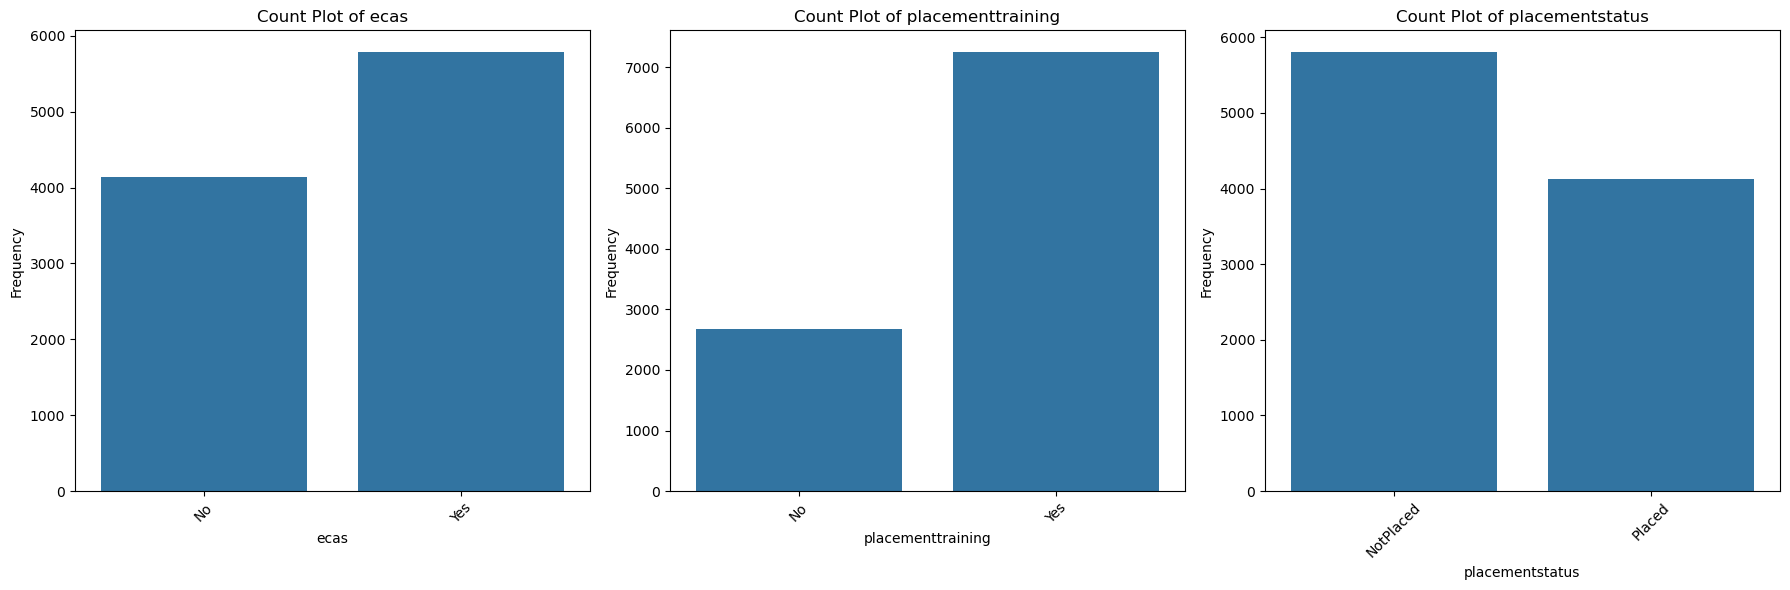

In [44]:
plot_categorical_counts(columns_2)

#### Summary of the Plots for the Categorical Variables

1. **Extracurricular Activities**:  
   More individuals participate in extracurricular activities (**Yes**) than those who do not (**No**).

2. **Placement Training**:  
   A significant majority have undergone placement training (**Yes**), while a smaller proportion has not (**No**).

3. **Placement Status**:  
   A higher number of individuals fall under the **"Not Placed"** category compared to those who are **"Placed"**. This indicates a mild imbalance in the target variable, which may not need to be addressed, Standard models (like Logistic Regression, SVM, KNN or Gradient Boosting) should perform well without much adjustment.

In [45]:
# Plot both a boxplot and a histogram (with KDE) for a numerical column.
def plot_numerical_distribution(column, color='blue'):

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Boxplot
    sns.boxplot(data=df, x=column, ax=axes[0], color=color)
    axes[0].set_title(f'Boxplot of {column}')

    # Histogram with KDE
    sns.histplot(data=df, x=column, bins=20, kde=True, color=color, ax=axes[1])
    axes[1].set_title(f'Histogram of {column}')

    # Adjust spacing between plots
    plt.tight_layout()
    plt.show()

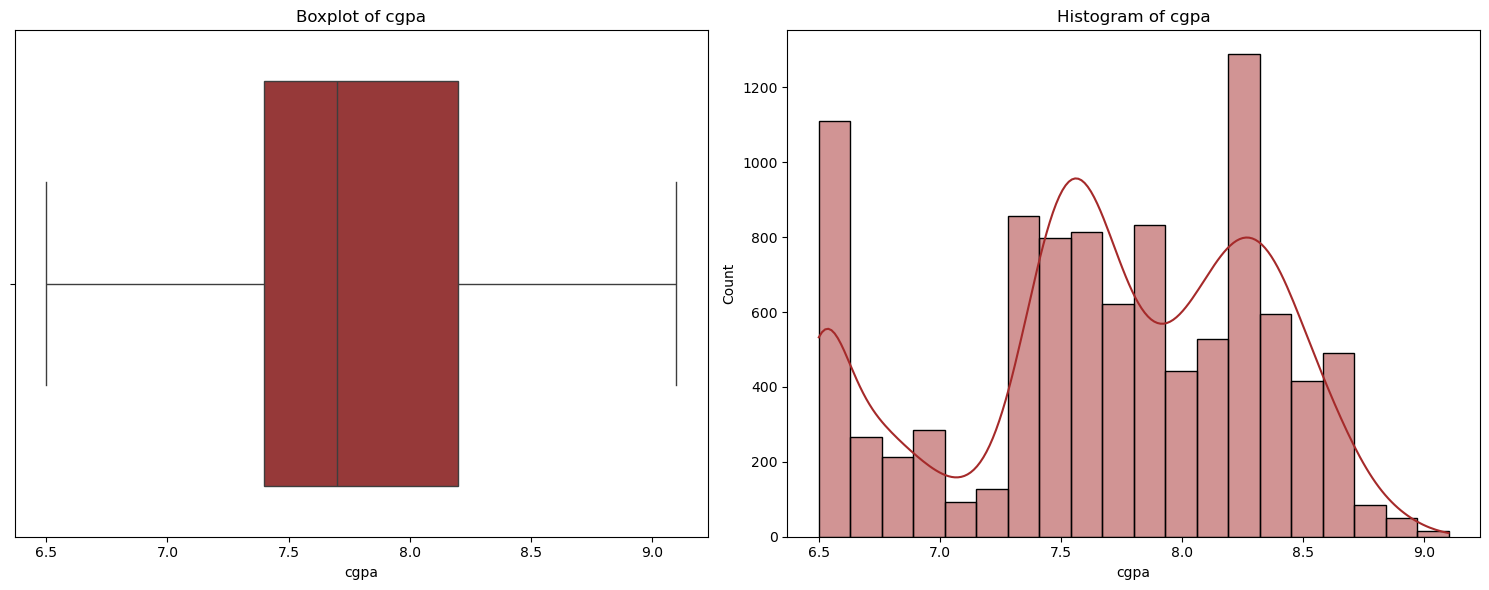

In [46]:
plot_numerical_distribution(column='cgpa', color='brown')

#### Summary of the Plots on CGPA

1. **Boxplot Analysis**:  
   - The CGPA values range approximately from **6.5 to 9.0**.  
   - The median CGPA is around **7.5 to 8.0**.  
   - No significant outliers are present, suggesting a well-distributed dataset.  

2. **Histogram with KDE**:  
   - The distribution appears **multi-modal**, indicating multiple peaks.  
   - There is a noticeable concentration of CGPA values around **6.5, 7.5-8.0, and 8.5**.  
   - The data is **slightly right-skewed**, meaning a small number of students have very high CGPA scores.

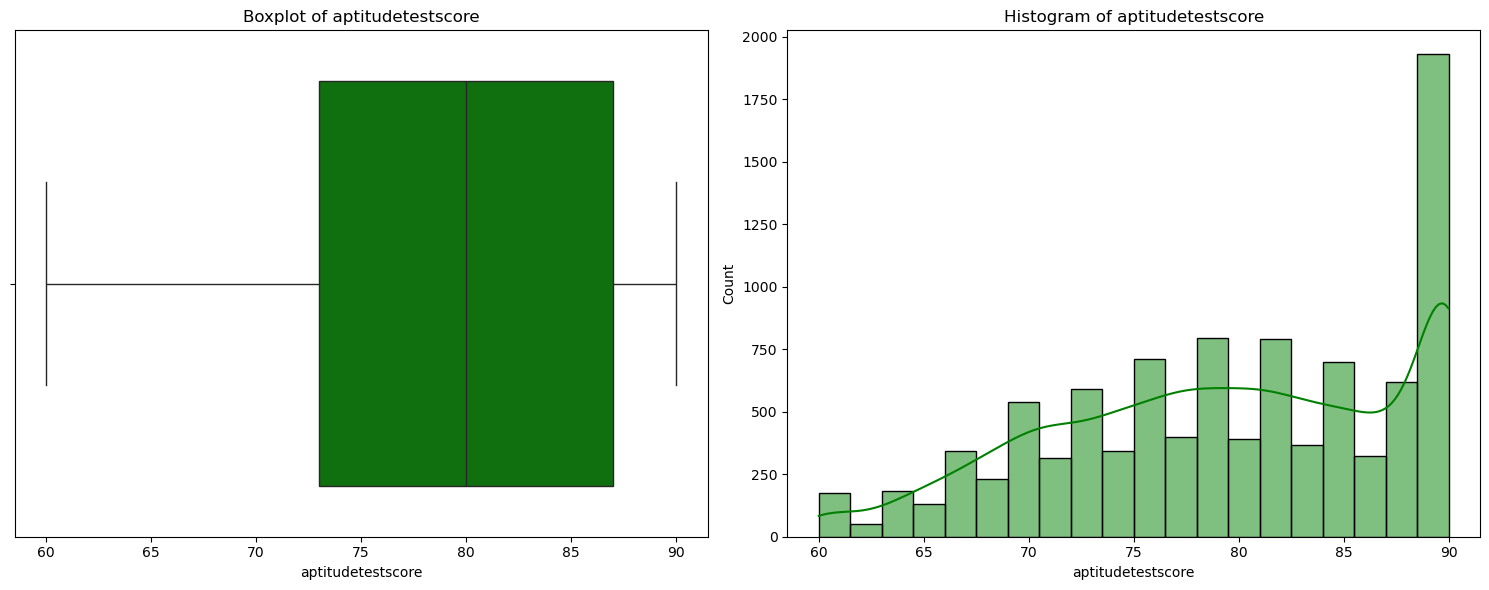

In [47]:
plot_numerical_distribution(column='aptitudetestscore', color='green')

#### Summary of the Plots on Aptitude Test Score  

1. **Boxplot Analysis**:  
   - The scores range from approximately **60 to 90**.  
   - The median score is around **75-80**.  
   - No significant outliers, indicating a well-contained distribution.
   - Most students have high aptitude scores, with a notable peak at 90.  

2. **Histogram with KDE**:  
   - The distribution appears **right-skewed**, which suggests that while a few students score lower, the majority perform above average with a concentration of scores near **90**.  
   - The frequency of lower scores is relatively smaller, suggesting many students perform well in the test.  
   - There is a gradual increase in frequency as the scores increase, peaking around 90.

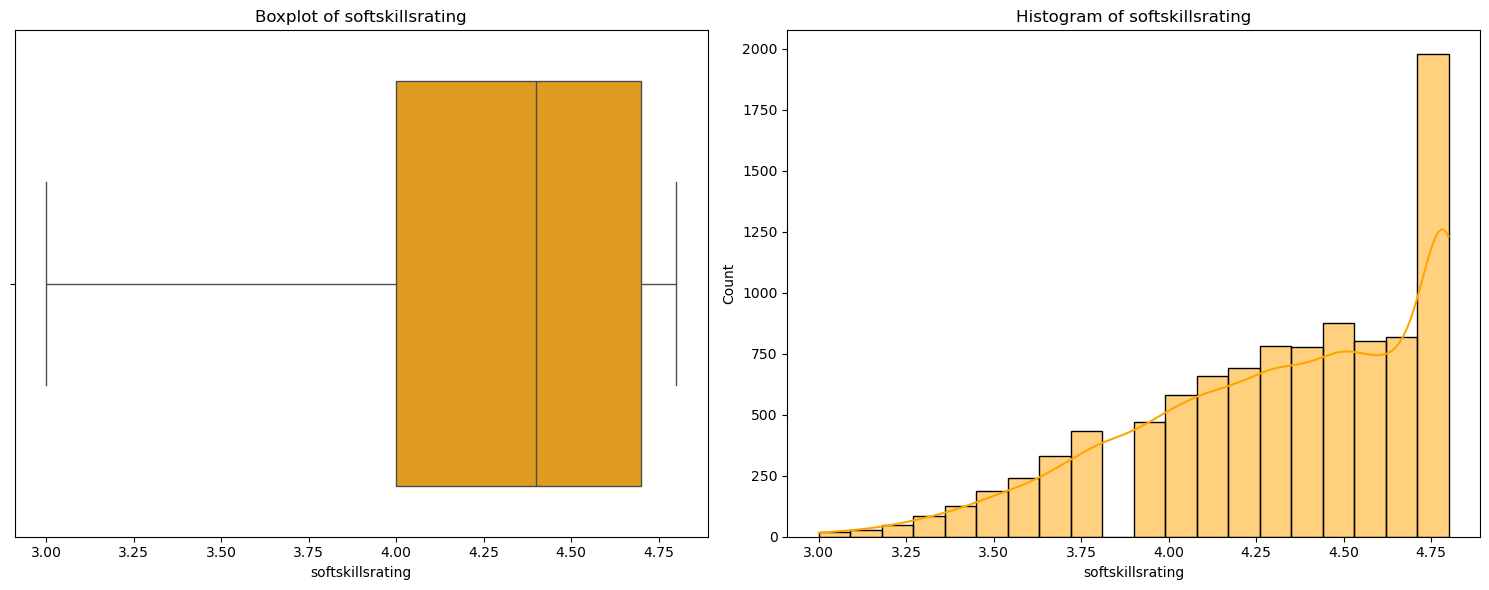

In [48]:
plot_numerical_distribution(column='softskillsrating', color='orange')

#### Summary of the Plots on Soft Skills Rating  

1. **Boxplot Analysis**:  
   - The soft skills rating ranges from **3.0 to 4.8**.  
   - The median is around **4.2 to 4.3**, meaning most students have above-average soft skills.
   - Most students have **strong soft skills**, which could be a positive factor in placement.    
   - No significant outliers, suggesting a smooth distribution.  

2. **Histogram with KDE**:  
   - The distribution is **right-skewed**, with most ratings clustering around **4.8** which indicates that low ratings are rare, while high ratings dominate.
   - Very few students have ratings below 3.5.
   - A gradual increase in frequency is observed as ratings approach the higher end. 

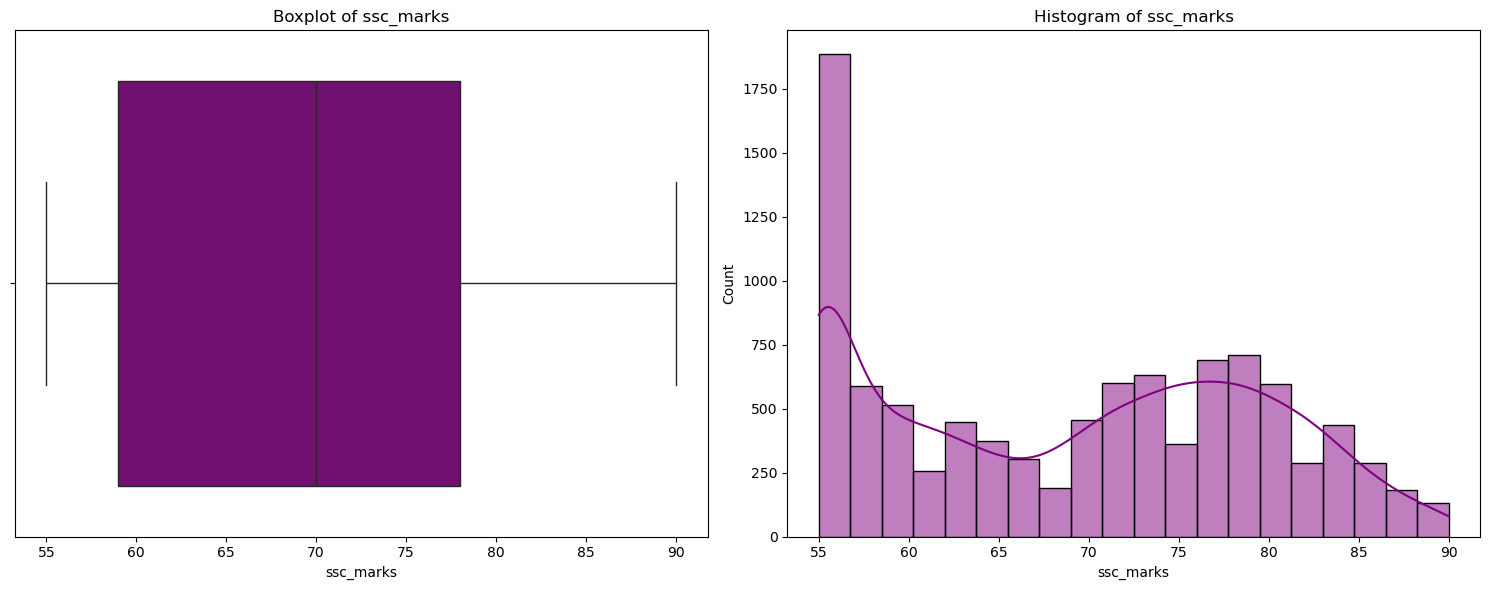

In [49]:
plot_numerical_distribution(column='ssc_marks', color='purple')

#### Summary of the Plots on SSC Marks  

1. **Boxplot Analysis**:  
   - The SSC marks range from **55 to 90**.  
   - The median is around **70 to 75**, meaning half the students scored above this range. 
   - A notable portion of students scored **below 60**, which could indicate a weaker academic foundation for some.  
   - The distribution appears fairly symmetrical with no extreme outliers.  

2. **Histogram with KDE**:  
   - The distribution is **slightly right-skewed**, with a peak around **55 marks**, indicating a good number of students scored at the lower end.  
   - The frequency of scores increases around **70 to 80**, suggesting most students fall into this range.  
   - The highest number of students scored around **55**, with a gradual decline toward the higher end.  

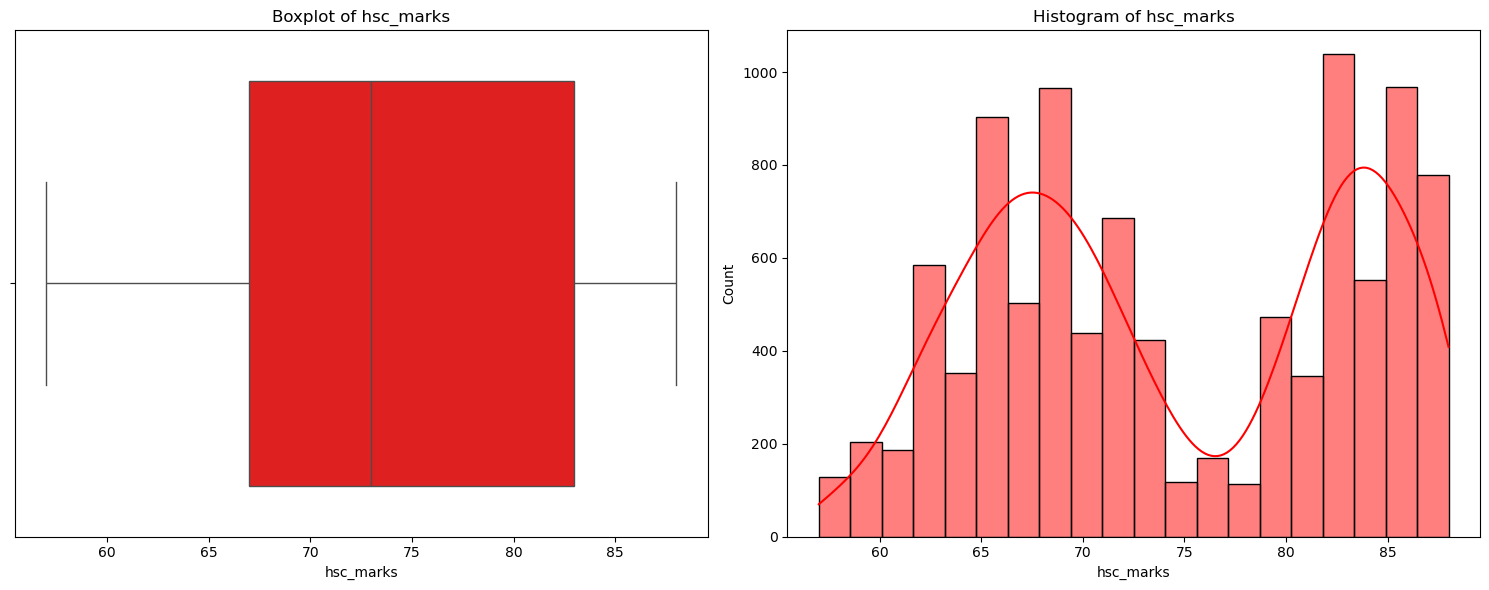

In [50]:
plot_numerical_distribution(column='hsc_marks', color='red')

#### Summary of the Plots on HSC Marks

1. **Boxplot Analysis**:  
   - The HSC marks range from **around 55 to 90**.  
   - The median is approximately **75**, suggesting that half the students scored above this.  
   - The distribution appears balanced, with no extreme outliers.  

2. **Histogram with KDE**:  
   - The distribution appears **bimodal**, meaning there are **two peaks** around **65–70 and 80–85**. This **bimodal distribution** suggests that students' HSC scores may be influenced by distinct factors, such as different education boards or streams. 
   - A notable dip is observed around **75**, indicating fewer students scored in this range.  
   - The highest concentration of students scored around **70 and 85**, indicating two dominant scoring groups.

---

<a id="bivariate-analysis"></a>

## **2.4 Bivariate Analysis: Exploring Relationships Between Two Variables**

We analyze the relationships between pairs of variables, helping us identify correlations and potential predictors.

In [51]:
# Count Plot for each of the Categorical variables and checking the relationship with the Target
def target_count_plots(columns):

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

    for i, column in enumerate(columns):
        if i < len(axes):
            sns.countplot(x=column, hue='placementstatus', data=df, ax=axes[i])
            axes[i].set_title(f'Count Plot of {column} by Placement Status')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
            axes[i].tick_params(axis='x', rotation=45)

    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

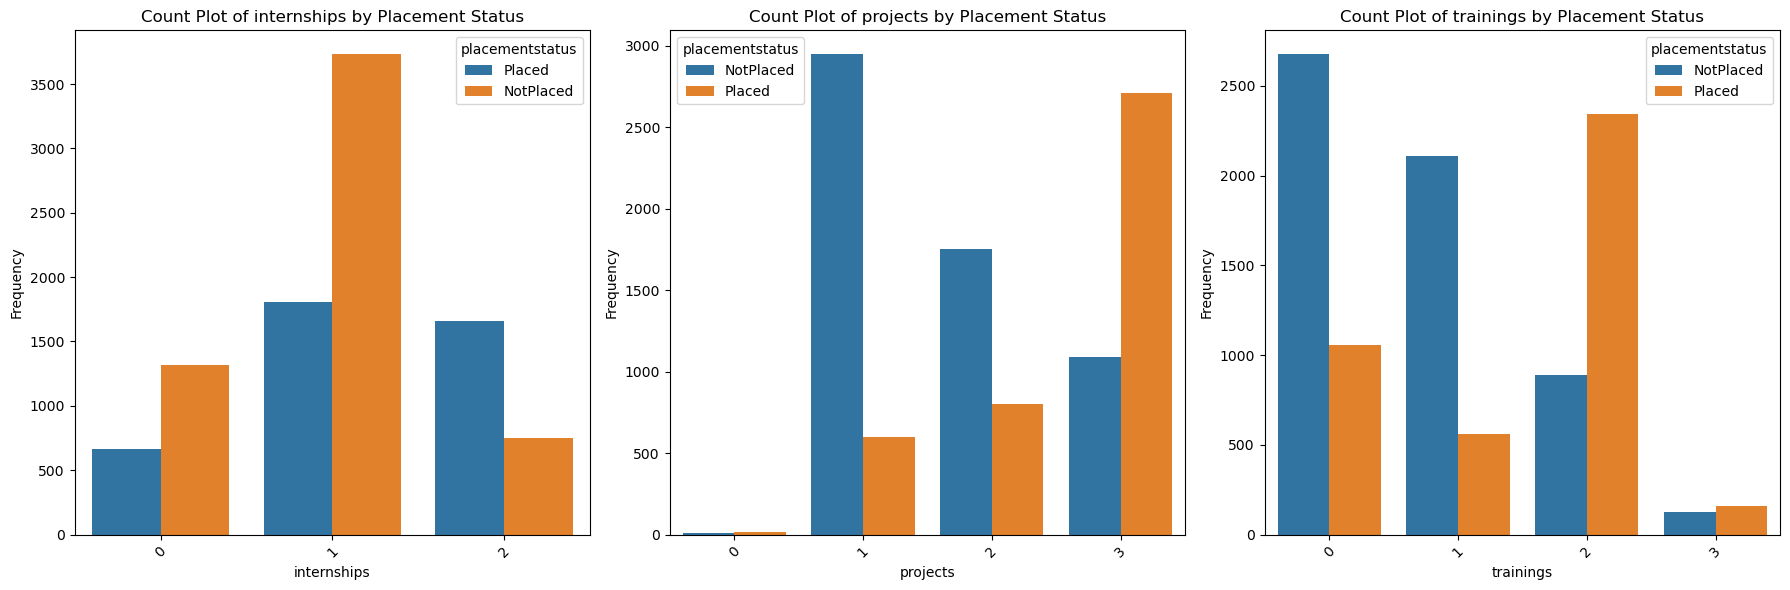

In [52]:
target_count_plots(columns_1)

#### Summary of Relationship Between Each Categorical Variable and Placement Status  

1. **Internships vs Placement Status**:  
   - Students with **0 internships** are more frequently **not placed** than placed.  
   - Having **1 or 2 internships** significantly increases placement chances.  
   - The majority of students with **2 internships** are **placed**, showing that practical experience plays a crucial role in job placements.  

2. **Projects vs Placement Status**:  
   - A **single project** is the most common, but students with **more than 1 project** tend to have a **higher placement rate**.  
   - **3 projects** show a strong correlation with being placed, while students with **0 projects** are rarely placed.  
   - This highlights the importance of hands-on projects in securing job placements.  

3. **Workshops/Certifications vs Placement Status**:  
   - Students with **no workshops/certifications** are **mostly not placed**.  
   - Those with **2 workshops/certifications** have a significantly **higher placement rate**.  
   - **3 certifications/workshops** are less frequent but show a consistent positive impact on placement success.  

#### Key Insights
- **Internships, projects, and certifications** all play a vital role in improving placement chances.  
- **More experience (internships & projects) strongly correlates with higher placement rates**.  
- Encouraging students to engage in **multiple practical activities** can significantly **boost employability**.

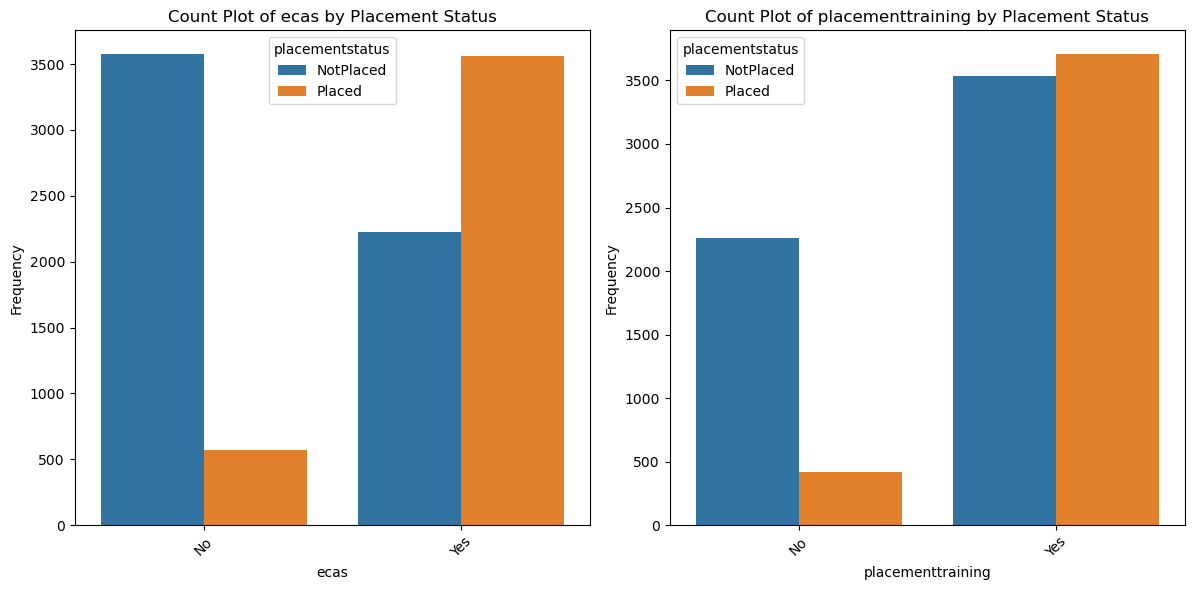

In [53]:
# Removing placement status from column 2
columns_2 = ['ecas', 'placementtraining']

target_count_plots(columns_2)

#### Summary of Relationship Between Each Categorical Variable and Placement Status

1. **Extracurricular Activities vs Placement Status**:  
   - Students who **did not participate** in extracurricular activities have a **high non-placement rate**.  
   - Those who **engaged in extracurricular activities** have a significantly **higher placement rate**.  
   - This suggests that involvement in extracurriculars enhances employability and placement chances.  

2. **Placement Training vs Placement Status**:  
   - Students who **did not undergo placement training** have **low placement rates**.  
   - Those who **received placement training** have a much **higher likelihood of being placed**.  
   - This highlights the strong impact of training programs on improving students' placement outcomes.  

#### Key Insights
- **Extracurricular activities** and **placement training** significantly boost placement chances.  
- **Training programs** seem to be a critical factor in securing job placements.  
- Encouraging students to **actively participate in both areas** can improve their employability.

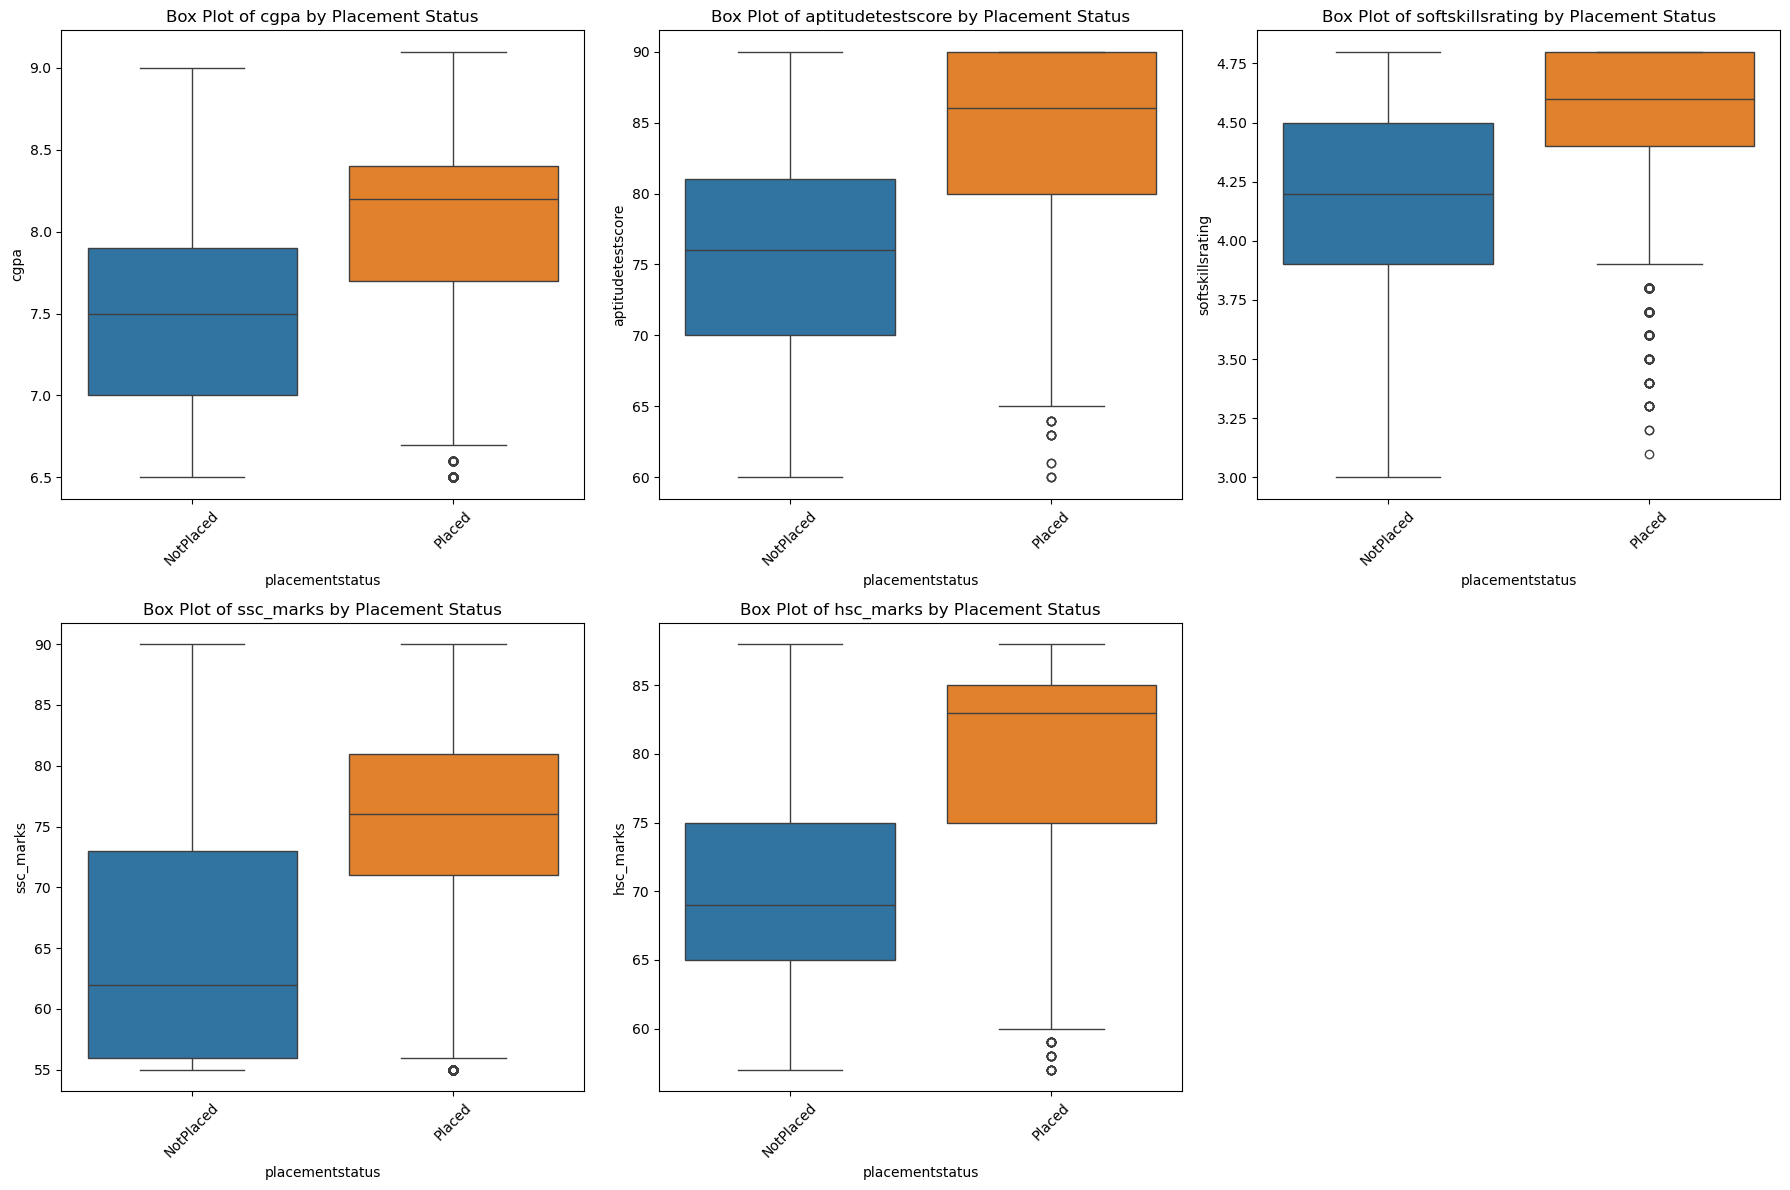

In [54]:
# Grouping the Numerical Columns
numerical_columns = [
    'cgpa', 'aptitudetestscore', 'softskillsrating', 'ssc_marks', 'hsc_marks'
    ]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.flatten()

# Plotting box plots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(
        data=df, x="placementstatus", y=column, ax=axes[i], 
        hue="placementstatus", dodge=False, palette=sns.color_palette("tab10", 2)
    )
    axes[i].set_title(f"Box Plot of {column} by Placement Status")
    axes[i].tick_params(axis='x', rotation=45)

# Hiding any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

#### Summary of Relationship Between Each Numerical Variable and Placement Status  

1. **CGPA vs Placement Status**:  
   - Students with higher CGPA tend to have a **higher placement rate**.  
   - The median CGPA of placed students is **higher than non-placed students**.  
   - A few lower CGPA outliers exist among placed students, but overall, **higher CGPA improves placement chances**.  

2. **Aptitude Test Score vs Placement Status**:  
   - Students with **higher aptitude test scores** are more likely to be placed.  
   - The **median score for placed students is significantly higher**.  
   - Some non-placed students have high scores, indicating other factors may also influence placement.  

3. **Soft Skills Rating vs Placement Status**:  
   - Placed students generally have **higher soft skills ratings** than non-placed students.  
   - There are more **low-rating outliers** among non-placed students.  
   - This suggests that strong soft skills can **positively impact placement chances**.  

4. **SSC (Secondary School) Marks vs Placement Status**:  
   - Students with **higher SSC marks** tend to have a **higher placement rate**.  
   - The distribution of non-placed students leans towards lower marks.  
   - However, SSC marks alone are not a **strong determinant of placement**.  

5. **HSC (Higher Secondary) Marks vs Placement Status**:  
   - Similar to SSC, **higher HSC marks** are associated with **better placement chances**.  
   - The median HSC marks for placed students are **higher than for non-placed students**.  
   - Some outliers exist, but **higher academic performance in HSC correlates with placement success**.  

#### Key Insights
- **Higher CGPA, aptitude scores, and soft skills ratings** strongly correlate with better placement outcomes.  
- **SSC and HSC marks** play a role but are not the primary determinants of placement success.  
- **Improving aptitude and soft skills** alongside **strong academics** can significantly enhance placement chances.

---

<a id="data-encoding"></a>

## **2.5 Data Encoding**

In this section, we convert categorical variables into numerical formats where necessary. This is essential for some visualizations and later for machine learning models, which require numeric inputs.

In [55]:
# Converting categorical variables to numeric

# Extracurricular Activities: Map 'Yes' to 1, 'No' to 0
df['ecas'] = df['ecas'] \
    .map({'Yes': 1, 'No': 0}).astype(int)

# Placement Training: Map 'Yes' to 1, 'No' to 0
df['placementtraining'] = df['placementtraining'] \
    .map({'Yes': 1, 'No': 0}).astype(int)

# Placement Status: Map 'Placed' to 1, 'NotPlaced' to 0
df['placementstatus'] = df['placementstatus'] \
    .map({'Placed': 1, 'NotPlaced': 0}).astype(int)

---

<a id="multivariate-analysis"></a>

## **2.6 Multivariate Analysis: Examining Interactions Among Multiple Variables**

We investigate complex interactions among three or more variables to gain deeper insights into the data structure.

<Figure size 1800x600 with 0 Axes>

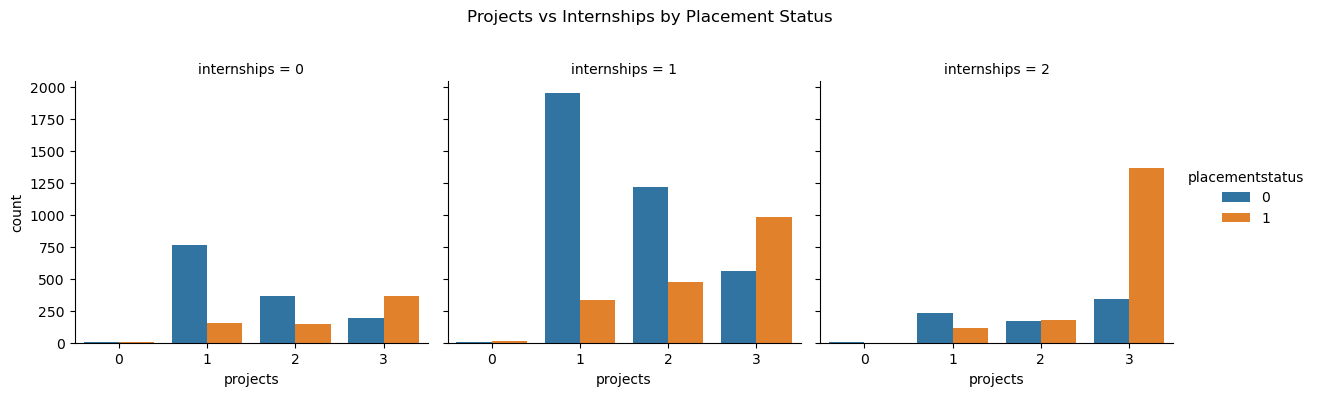

In [56]:
# Count plot showing how project completion varies with internships and placement status
plt.figure(figsize=(18, 6))
sns.catplot(
    data=df, 
    x='projects', 
    hue='placementstatus', 
    col='internships', 
    kind='count', 
    palette=sns.color_palette("tab10", 2), 
    height=4, 
    aspect=1)

plt.subplots_adjust(top=0.8)
plt.suptitle('Projects vs Internships by Placement Status')
plt.show()


#### Projects vs Internships by Placement Status

- **Students with 2 internships and 3 projects** show the **highest placement rate**, suggesting a strong correlation between experience and placement success.
- For **0 or 1 internship**, increasing the number of projects improves placement chances, but **the placement rate is still relatively low**.
- **Without internships**, even students with multiple projects face difficulty in placement—highlighting the importance of internships.
- Overall, a **combination of internships and multiple projects** significantly improves employability and placement outcomes.

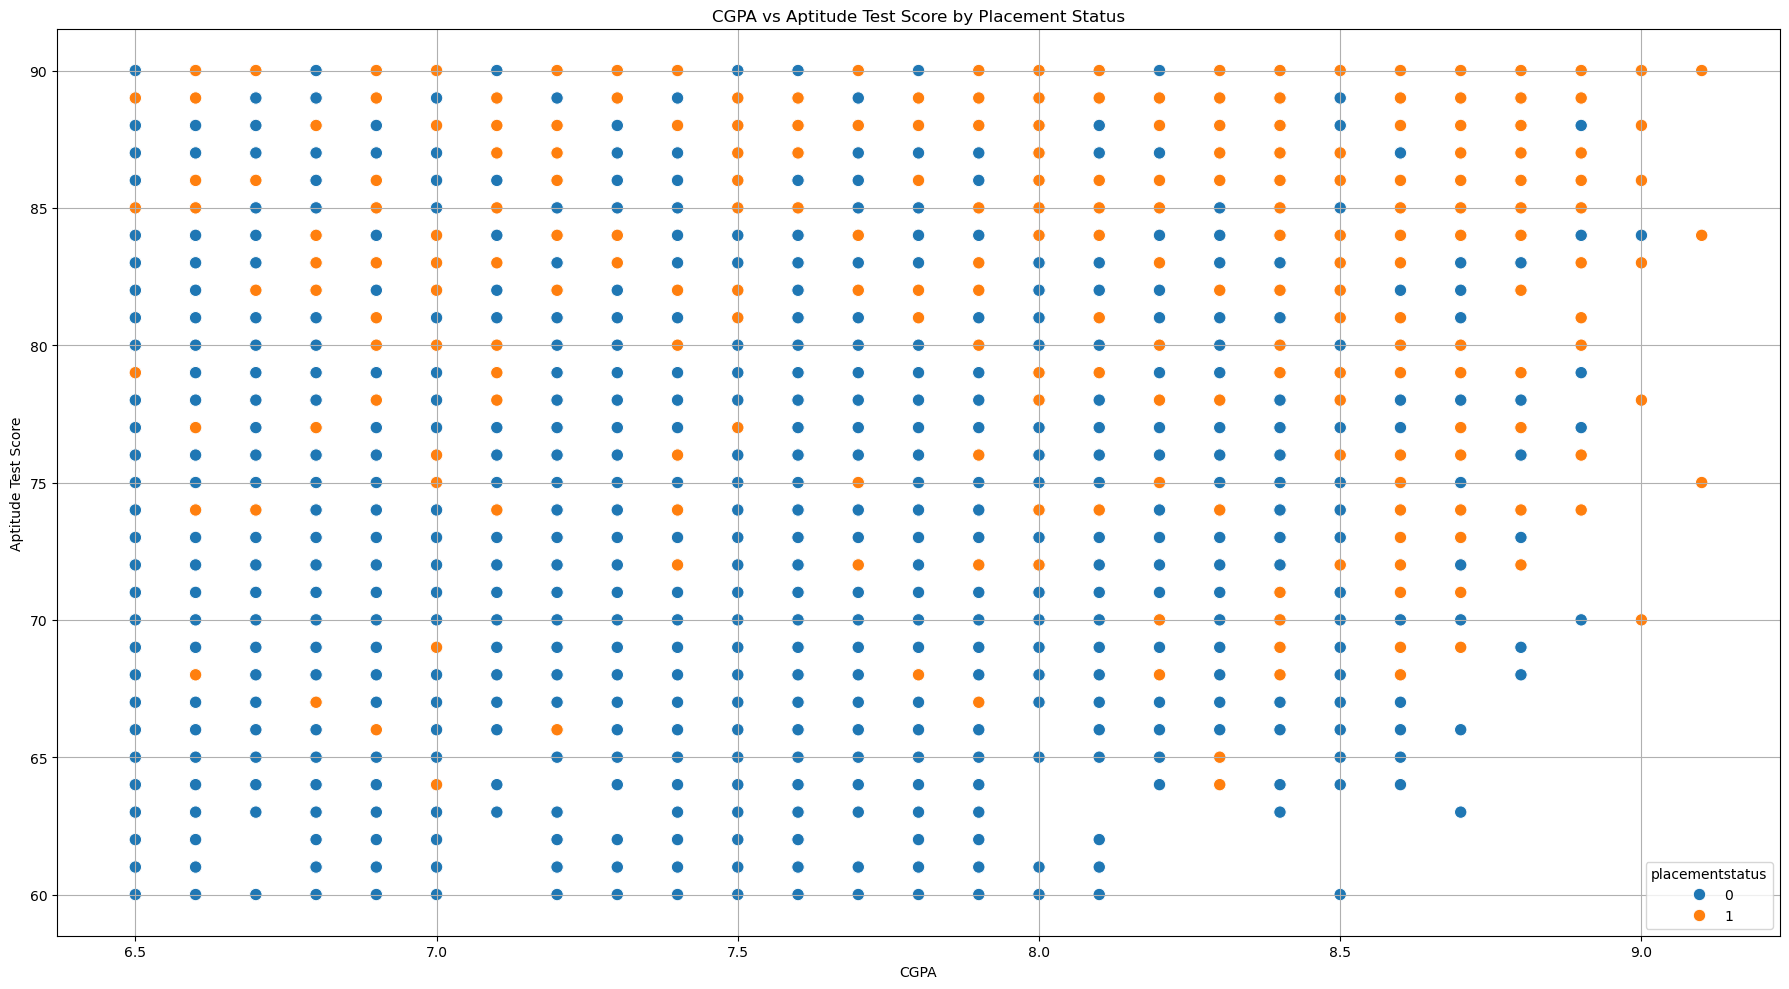

In [57]:
# Create a scatter plot to analyze the relationship between CGPA and Aptitude Score
plt.figure(figsize=(18,10))
sns.scatterplot(
    data=df, 
    x='cgpa', 
    y='aptitudetestscore', 
    hue='placementstatus', 
    palette=sns.color_palette("tab10", 2), 
    s=80)

plt.title('CGPA vs Aptitude Test Score by Placement Status')
plt.xlabel('CGPA')
plt.ylabel('Aptitude Test Score')

plt.grid(True)
plt.tight_layout()
plt.show()


#### CGPA vs Aptitude Test Score by Placement Status

- Students with **higher CGPA and higher aptitude scores** tend to have a **greater chance of placement** (orange dots are more concentrated in the upper-right).
- **Lower CGPA and aptitude scores** are associated with a **higher non-placement rate** (more blue dots).
- There's a **positive trend** suggesting that strong academic performance and aptitude are both important factors in placement success.
- However, overlap exists—**some students with good scores are not placed**, indicating **other factors may also influence placement** (e.g., soft skills, projects, etc.).

<Figure size 1800x600 with 0 Axes>

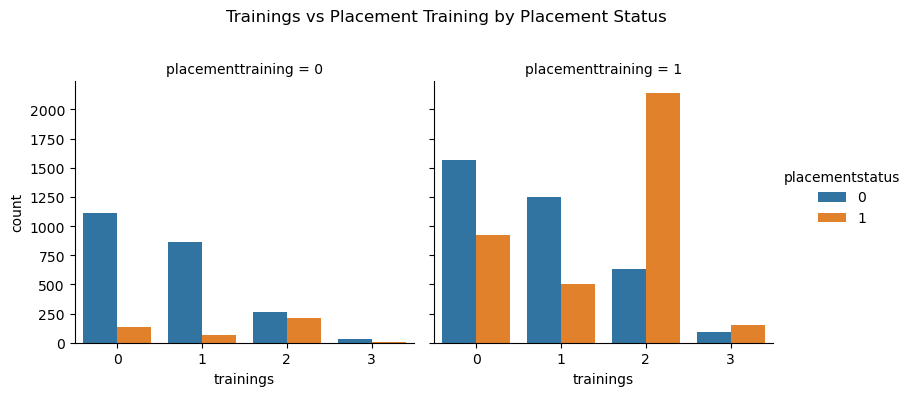

In [58]:
# Count plot comparing number of trainings attended vs placement status
plt.figure(figsize=(18, 6))
sns.catplot(
    data=df,
    x='trainings',
    hue='placementstatus',
    col='placementtraining',
    kind='count',
    palette=sns.color_palette("tab10", 2),
    height=4,
    aspect=1
)

plt.subplots_adjust(top=0.8)
plt.suptitle('Trainings vs Placement Training by Placement Status')
plt.show()

#### Workshops/Certifications vs Placement Training by Placement Status

**Placement Training = 0**:  
- Most students have **0 or 1 workshop/certification**, with relatively few achieving placement (orange).  
- Additional workshops/certifications (2 or 3) are less common and still show low placement rates.  

**Placement Training = 1**:  
- Students with **2 workshops/certifications** have a **significantly higher placement rate** (mostly orange).  
- Placement rates increase consistently with more workshops/certifications, indicating that **both placement training and the number of workshops/certifications positively affect placement success**.

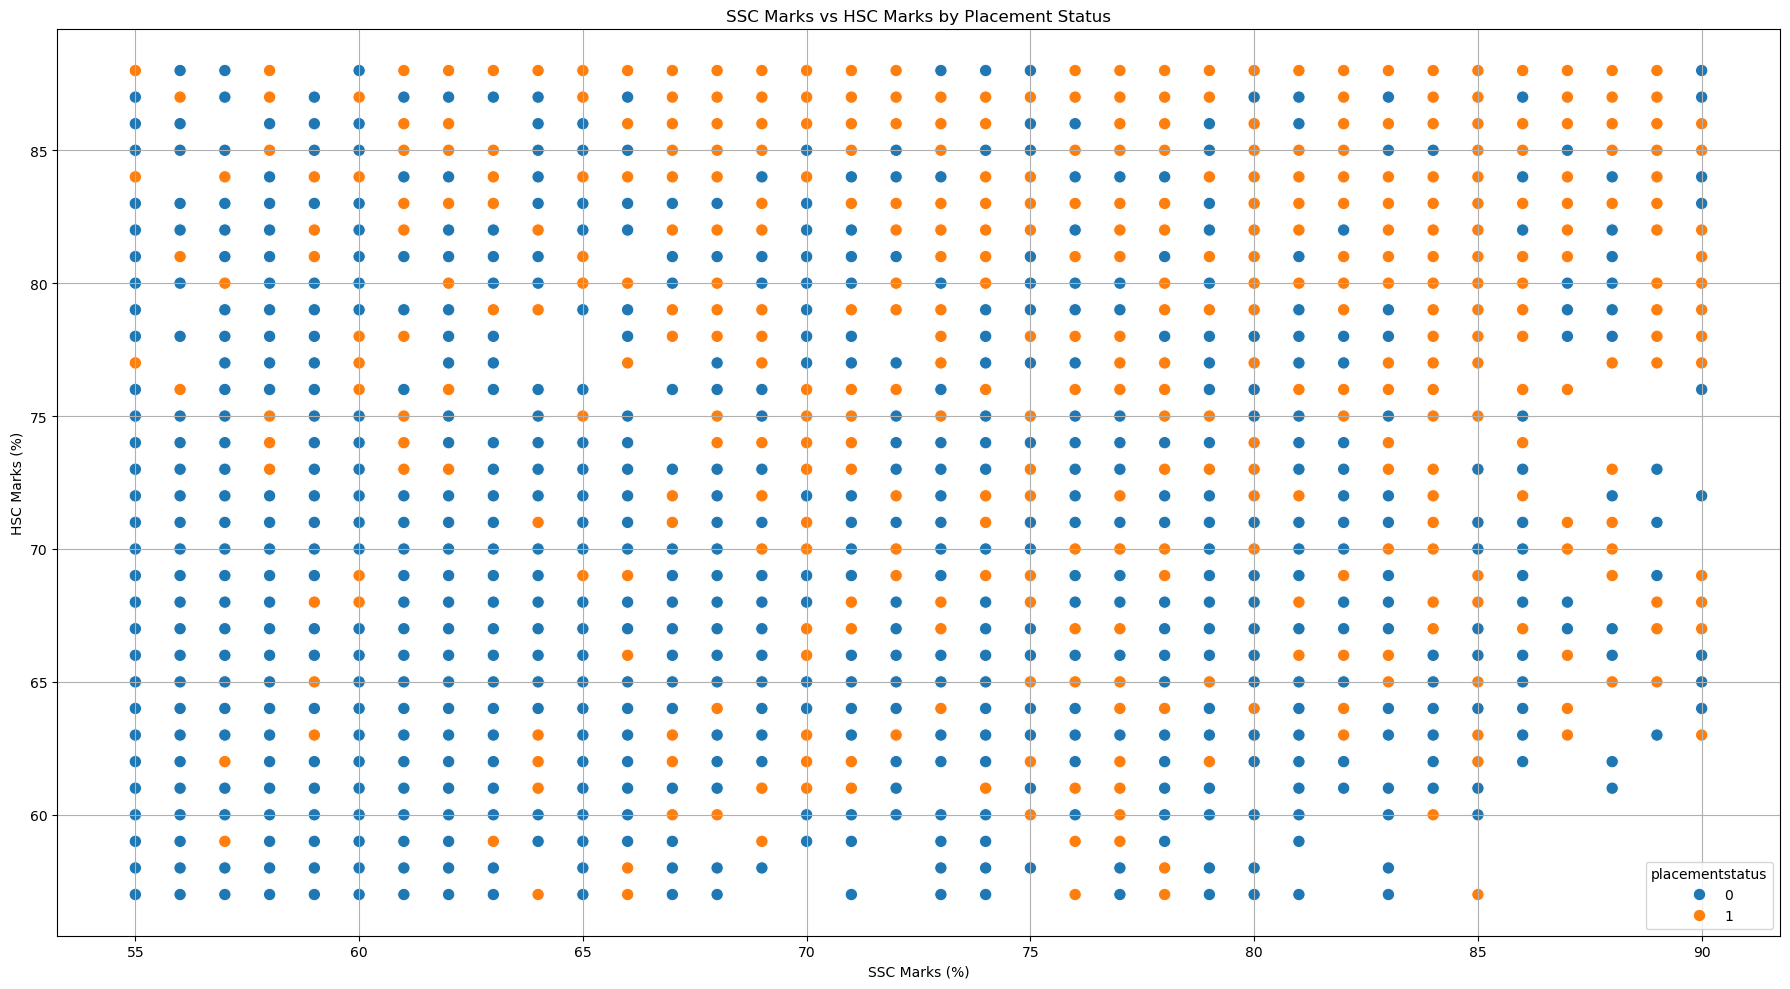

In [59]:
# Scatter plot of SSC vs HSC marks, colored by placement status
plt.figure(figsize=(18,10))
sns.scatterplot(
    data=df,
    x='ssc_marks',
    y='hsc_marks',
    hue='placementstatus',
    palette=sns.color_palette("tab10", 2),
    s=80
)

# Add plot details
plt.title('SSC Marks vs HSC Marks by Placement Status')
plt.xlabel('SSC Marks (%)')
plt.ylabel('HSC Marks (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### SSC Marks vs HSC Marks by Placement Status

- The scatter plots show the relationship between **SSC Marks (%)** and **HSC Marks (%)** across different placement statuses.
- **Placement Status 0 (Not Placed)** is represented in **blue**, while **Placement Status 1 (Placed)** is shown in **orange**.
- Both placed and non-placed students are distributed across a range of SSC and HSC marks.
- Students with **higher SSC and HSC marks** (above ~75%) tend to have a **higher placement rate** (more orange dots).
- The plots suggest that achieving higher marks in SSC and HSC exams correlates with a greater likelihood of being placed.

<Figure size 1800x600 with 0 Axes>

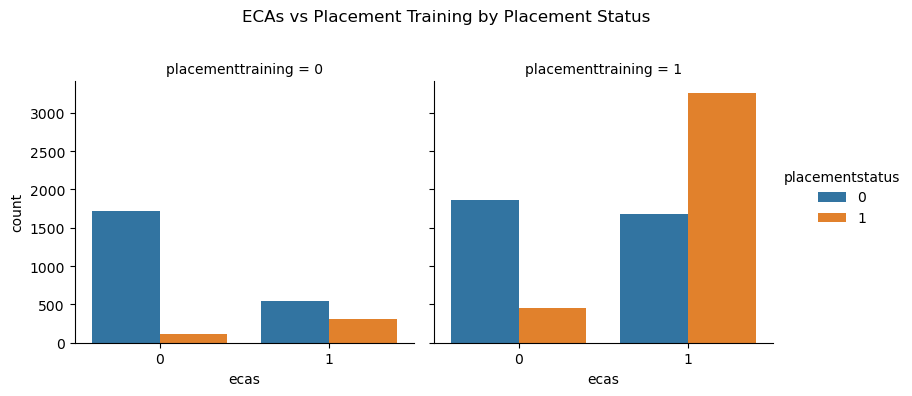

In [60]:
# Create a count plot for ECAs and placement training, split by placement status
plt.figure(figsize=(18, 6))
sns.catplot(
    data=df,
    x='ecas',
    hue='placementstatus',
    col='placementtraining',
    kind='count',
    palette=sns.color_palette("tab10", 2),
    height=4,
    aspect=1
)

plt.subplots_adjust(top=0.8)
plt.suptitle('ECAs vs Placement Training by Placement Status')
plt.show()

#### Extracurricular Activities vs Placement Training by Placement Status

**Placement Training = 0**:  
- Most students **do not participate in extracurricular activities (0)** and remain unplaced (blue).  
- Even among students who participate in extracurricular activities (1), placements are relatively low.  

**Placement Training = 1**:  
- Students who participate in extracurricular activities (1) show a **higher placement rate** (mostly orange).  
- Students without extracurricular activities have a more balanced distribution between placed and unplaced status.  
- This suggests that **participation in extracurricular activities enhances placement outcomes, especially when combined with placement training**.

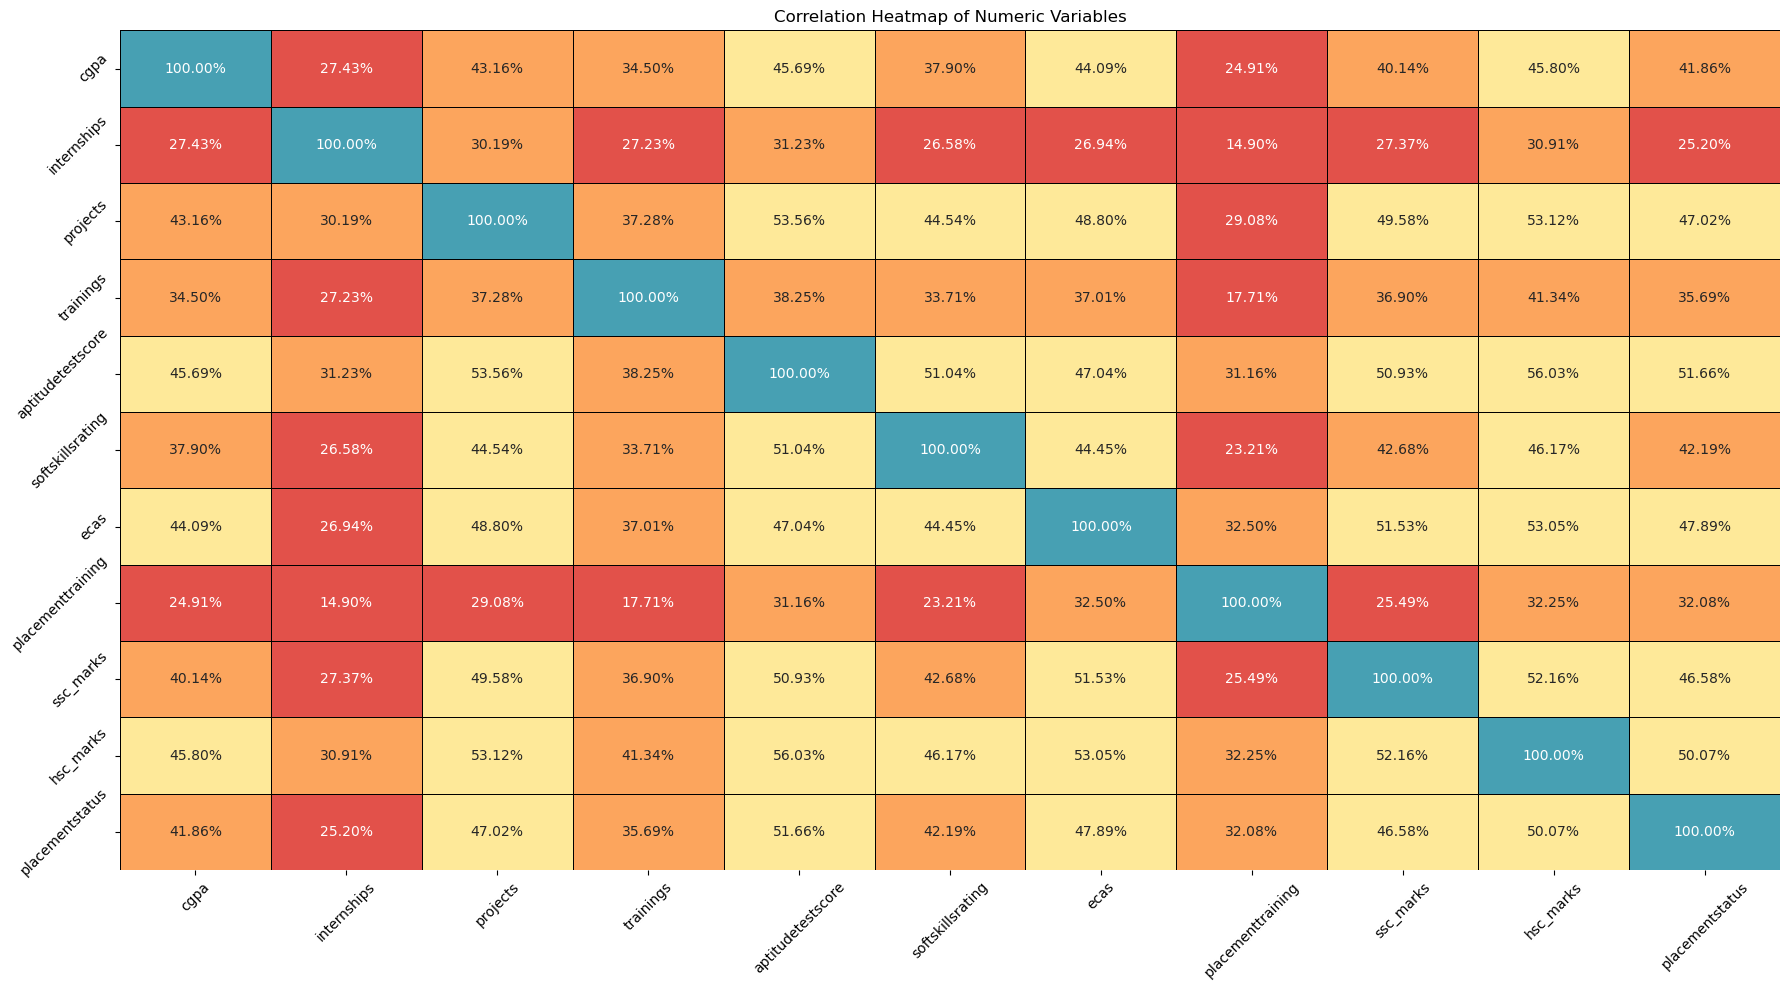

In [61]:
# Plotting a heatmap to check the correlation of the columns
plt.figure(figsize=(18,10))

sns.heatmap(
    df.corr(), 
    annot=True, 
    cmap=sns.color_palette("Spectral"), 
    cbar=False, 
    fmt='.2%', 
    linewidths=0.5, 
    linecolor="black");

plt.title('Correlation Heatmap of Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)

plt.tight_layout()
plt.show()

#### Key Observations from the Correlation Heatmap  

1. Strong Positive Correlations:  
   - **CGPA and Placement Status (42.31%)**: Higher CGPA is positively correlated with placement success.  
   - **Aptitude Test Score and Placement Status (52.17%)**: Higher aptitude test scores significantly increase placement chances.  
   - **HSC Marks and Placement Status (50.57%)**: Strong academic performance in higher secondary school is linked to better placements.  
   - **Projects and Placement Status (47.52%)**: Students who worked on more projects had higher placement chances.  

2. Moderate Positive Correlations:  
   - **SSC Marks and Placement Status (46.98%)**: A good secondary school performance contributes to placement success but is slightly weaker than HSC marks.  
   - **Extracurricular Activities and Placement Status (48.25%)**: Participation in extracurricular activities positively influences placement outcomes.  
   - **Soft Skills Rating and Placement Status (42.73%)**: Strong soft skills help in securing placements.  

3. Weaker Positive Correlations:  
   - **Internships and Placement Status (26.03%)**: Having internships contributes to placements, but the correlation is weaker compared to CGPA and aptitude scores.  
   - **Workshops/Certifications and Placement Status (36.23%)**: While beneficial, certifications alone do not guarantee placement.  
   - **Placement Training and Placement Status (32.37%)**: Placement training helps but is not the most significant factor.  

4. Inter-Feature Correlations:  
   - **Aptitude Test Score and CGPA (46.13%)**: Higher CGPA students also tend to score well in aptitude tests.  
   - **Projects and Extracurricular Activities (49.14%)**: Students engaged in projects are also likely to participate in extracurricular activities.  
   - **SSC Marks and HSC Marks (52.49%)**: Strong academic performance in secondary school tends to continue into higher secondary education.  
   - **Aptitude Test Score and HSC Marks (56.51%)**: Students with strong HSC marks tend to perform better in aptitude tests.  

#### General Insights:  
- **CGPA**, **Aptitude Test Scores**, and **HSC Marks** are the strongest predictors of placement.  
- **Soft skills**, **extracurricular activities**, and **projects** provide additional advantages in securing placements.  
- **Placement training**, **internships**, and **workshops** contribute but are not as strongly correlated with placement success.  
- A balanced approach, combining academics, aptitude, soft skills, and practical experience, improves placement chances.

---

<a id="summary"></a>

## **2.7 Summary and Key Insights**

We summarize the key findings from the visual analysis to guide the next phases of the project.

#### Categorical Variable Insights

* **Internships**: 1–2 internships significantly improve placement chances.
* **Projects**: Completing 2 or more projects strongly correlates with getting placed.
* **Workshops/Certifications**: 2 or more certifications boost placement likelihood.
* **Extracurricular Activities**: Participation increases employability.
* **Placement Training**: Trained students have much higher placement rates.
* **Placement Status**: Slight class imbalance (more “Not Placed”), but not severe.

#### Numerical Variable Insights

* **CGPA**:

  * Median around 7.5–8.0, no major outliers.
  * Higher CGPA increases placement chances.

* **Aptitude Test Score**:

  * Median score \~75–80, right-skewed with a peak at 90.
  * Strong correlation with placement.

* **Soft Skills Rating**:

  * Most students rated ≥4.0.
  * Higher ratings correspond with better placement rates.

* **SSC Marks**:

  * Range 55–90, median 70–75.
  * Slight right-skew; lower scores more common among non-placed.

* **HSC Marks**:

  * Bimodal distribution with peaks at 65–70 and 80–85.
  * Higher HSC scores align with higher placement rates.

#### Relationship with Placement Status

* **Strong Predictors**:

  * **CGPA**, **Aptitude Scores**, **HSC Marks**, and **Projects**.
* **Moderate Predictors**:

  * **SSC Marks**, **Extracurricular Activities**, **Soft Skills**.
* **Weaker Predictors**:

  * **Internships**, **Certifications**, **Placement Training**.

#### Key Insights

* **Academic Performance** (CGPA, HSC, SSC) is a critical driver of placement.
* **Aptitude and Soft Skills** further differentiate placed candidates.
* **Practical Exposure** (internships, projects, workshops) greatly improves employability.
* **Well-rounded profiles**—those with strong academics, practical experience, and extracurricular involvement—are most likely to succeed.


---

## **2.8 Save the Cleaned Dataset**

After completing the data cleaning and preprocessing steps, save the cleaned dataset to a CSV file for future use and reproducibility.

In [62]:
# Create a clean copy of the DataFrame for further processing and cleaning steps.
df_model = df.copy()

In [63]:
# Display the first and last few rows of the cleaned dataset to verify changes
display(df_model)

,cgpa,internships,projects,trainings,aptitudetestscore,softskillsrating,ecas,placementtraining,ssc_marks,hsc_marks,placementstatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...
9923,7.5,1,1,2,72,3.9,1,0,85,66,0
9924,7.4,0,1,0,90,4.8,0,0,84,67,1
9925,8.4,1,3,0,70,4.8,1,1,79,81,1
9926,8.9,0,3,2,87,4.8,1,1,71,85,1


In [64]:
# Check the shape of the dataset after cleaning and feature Selecting
print("Dataset shape after cleaning:")
print(df_model.shape)

Dataset shape after cleaning:
(9928, 11)


In [65]:
# Get basic statistical summary
print("Statistical Summary:")
display(df_model.describe().T)

Statistical Summary:


,count,mean,std,min,25%,50%,75%,max
cgpa,9928.0,7.693946,0.639961,6.5,7.4,7.7,8.2,9.1
internships,9928.0,1.042808,0.663699,0.0,1.0,1.0,1.0,2.0
projects,9928.0,2.019944,0.867118,0.0,1.0,2.0,3.0,3.0
trainings,9928.0,1.006849,0.903612,0.0,0.0,1.0,2.0,3.0
aptitudetestscore,9928.0,79.376209,8.140884,60.0,73.0,80.0,87.0,90.0
softskillsrating,9928.0,4.320679,0.411211,3.0,4.0,4.4,4.7,4.8
ecas,9928.0,0.582595,0.493156,0.0,0.0,1.0,1.0,1.0
placementtraining,9928.0,0.729855,0.444057,0.0,0.0,1.0,1.0,1.0
ssc_marks,9928.0,69.093372,10.428709,55.0,59.0,70.0,78.0,90.0
hsc_marks,9928.0,74.425766,8.901786,57.0,67.0,73.0,83.0,88.0


In [66]:
# Save numeric encoded dataset for modeling
df_model.to_csv('placement_encoded.csv', index=False)